<a href="https://colab.research.google.com/github/nitya8747/my-c-tests/blob/master/ass-2%20cs724.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **ASSIGNMENT - 2 (CS724)**

Name - Nitya Aggarwal

Roll No.- 200651



Question - 1

Step - 1 (Finding the Path Loss Exponent)


In this evaluation, I downloaded and utilized the WiFi Analyzer app on my smartphone to assess its capacity to identify my WiFi Access Point (AP) and collect received signal strength (RSSI) data. The app accurately identified my WiFi AP and displayed relevant information, including the network's name (SSID) and signal strength. I collected multiple RSSI samples at varying distances and orientations from the AP, observing fluctuations in signal strength.


Since there was no means of checking the actual distances from the Wifi AP I used and shown with increase from an initial distance "x".


In [58]:
import math
import numpy as np


distances = [ 1, 2, 3, 4, 5, 6 ]

def calculate_log_distance( distance ):
  log_distances = [ math.log(distance, 10) for distance in distances ]
  return log_distances

log_distances = calculate_log_distance(distances)

print("Log Distances:")
print(log_distances)

signal_strengths = {
    '1_meter': [-35, -36, -37, -45, -40, -42],
    '2_meter': [-60, -66, -60, -41, -56, -64],
    '3_meter': [-62, -70, -69, -76, -66, -73],
    '4_meter': [-78, -68, -69, -77, -79, -72],
    '5_meter': [-80, -83, -84, -86, -73, -76],
    '6_meter': [-88, -93, -91, -92, -89, -97]
}

def calculate_avg_signal_strength(signal_strengths):
    avg_signal_strengths = {}
    for distance, strengths in signal_strengths.items():
        avg_strength = sum(strengths) / len(strengths)
        avg_signal_strengths[distance] = avg_strength
    return avg_signal_strengths

avg_signal_strengths = calculate_avg_signal_strength(signal_strengths)

print(" ")

print("The Avg. Signal Strength received at a distance of:")

for distance, avg_strength in avg_signal_strengths.items():
    print(f" {distance} = {avg_strength:.2f}")

list_signal_strengths = list(avg_signal_strengths.values())


Log Distances:
[0.0, 0.30102999566398114, 0.47712125471966244, 0.6020599913279623, 0.6989700043360187, 0.7781512503836435]
 
The Avg. Signal Strength received at a distance of:
 1_meter = -39.17
 2_meter = -57.83
 3_meter = -69.33
 4_meter = -73.83
 5_meter = -80.33
 6_meter = -91.67


Here the avg signal strengths have been recorded now moving forward as asked in part C of the question, I plotted the received signal strength indicator (RSSI) values on the y-axis, represented in decibels (dB) or decibels milliwatts (dBm), while the distances were plotted on the x-axis using a logarithmic scale.

This graph allows me to observe the relationship between distance and signal strength in a clear and meaningful way. The logarithmic scale on the x-axis was chosen to better illustrate the exponential decrease in signal strength as distance increases, helping us assess how signal strength diminishes with increasing separation from the Wi-Fi access point (AP).

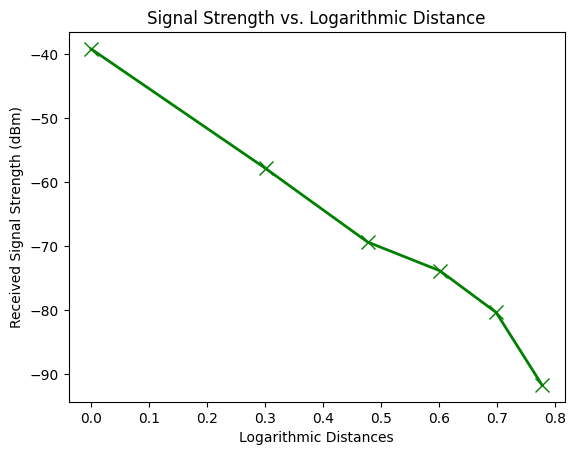

In [53]:
import matplotlib.pyplot as plt

# Plot the graph
plt.plot(log_distances, list_signal_strengths, linestyle='solid', linewidth=2, marker='x', markersize=10 , color='green')

# Labeling the axes
plt.xlabel("Logarithmic Distances")
plt.ylabel("Received Signal Strength (dBm)")
plt.title("Signal Strength vs. Logarithmic Distance")

# Display the plot
plt.show()

We got the initial plot, Now as per part (d) of the question we need to draw a best fit straight line corresponding to this log-log plot and post that we need to find out the slope of this line, divide it by 10 and take the absolute value, which will give the path loss exponent.

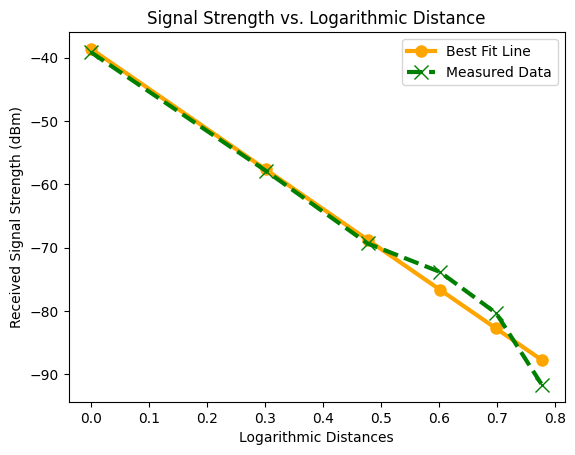

 
 
 
Path Loss Exponent:  6.3126609976294175


In [59]:
slope, intercept = np.polyfit(log_distances, list_signal_strengths, 1)

best_fit_line = slope * np.array(log_distances) + intercept

plt.plot(log_distances, best_fit_line, color='orange', linestyle='solid', linewidth=3,
         marker='o', markersize=8, label='Best Fit Line')

plt.plot(log_distances, list_signal_strengths, linestyle='dashed', linewidth=3,
         marker='x', markersize=10, label='Measured Data', color='green')

plt.xlabel("Logarithmic Distances")
plt.ylabel("Received Signal Strength (dBm)")
plt.title("Signal Strength vs. Logarithmic Distance")

plt.legend()
plt.show()

print(" ")
print(" ")
print(" ")

n = abs(slope/10)
print("Path Loss Exponent: ",n)

For the (E) part of the question we are required to find out the variance of these RSSI samples, w.r.t. the best fit line.

In [44]:
def compute_variance(x, y):
    num_samples = len(x)
    squared_differences = []
    for i in range(num_samples):
        squared_diff = (x[i] - y[i]) ** 2
        squared_differences.append(squared_diff)
    variance_result = sum(squared_differences) / num_samples
    return variance_result

variance_result = compute_variance(best_fit_line, list_signal_strengths)
print("Variance of RSSI data wrt best-fit line:", variance_result)


Variance of RSSI data wrt best-fit line: 4.951070780414921


PART -2 (RANGE ESTIMATION)

The purpose of this step is to find out the distance/range from the path loss
exponent that you have found in the last step.

(A) Noise part is being ignored in this part of the question. The formula used for calculation in this case would be

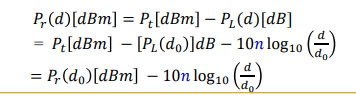


In [45]:
reference_distance = 1

received_signal_strength_at_d0 = -35
received_signal_strength_at_d6 = -88
path_loss_exponent_a = (received_signal_strength_at_d0 - received_signal_strength_at_d6) / (10 * n)


base_b = math.pow(10, path_loss_exponent_a)
estimated_distance = base_b * reference_distance


print("Estimated Distance 'd':", estimated_distance)


Estimated Distance 'd': 6.911662882464735


For (B) part of the question we will be considering the noise component. Due to the noise there will be some errors in range/distance
estimation. So, calculate the distance error by comparing with the actual
distance. Repeat this experiment for 5 different distances, and report the
average error

In [60]:
estimated_distances = []

def calculate_estimated_distances(received_strengths):
    ref_distance = 1
    estimated_distances = []
    ref_strength = received_strengths[0]

    for i in range(1, 6):
        path_loss_exponent = (ref_strength - received_strengths[i]) / (10 * n)
        base = math.pow(10, path_loss_exponent)
        est_distance = base * ref_distance
        estimated_distances.append(est_distance)

    return estimated_distances

estimated_distances = calculate_estimated_distances(list_signal_strengths)
print("Estimated Distance:")
print(estimated_distances)

# print("Data type of distance:", type(distance))
# print("Data type of estimated_distances:", type(estimated_distances))
# print("Contents of distance:", distance)
# print("Contents of estimated_distances:", estimated_distances)


def calculate_avg_error(actual_dist, estimated_dist):
    total_error = 0

    for i in range(1, 6):
        total_error += abs(distances[i] - estimated_dist[i-1])

    return total_error / 5

print(" ")
print(" ")
average_error = calculate_avg_error(distance, estimated_distances)
print("Average Error (meters):", average_error)


Estimated Distance:
[1.9756137002911935, 3.0052153659686627, 3.541285256956449, 4.488782703657289, 6.786751649081549]
 
 
Average Error (meters): 0.357257070829056
